In [1]:
import tensorflow as tf
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import ngrams

from numpy import asarray
from numpy import zeros
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn import metrics 
from sklearn.metrics import *


from tensorflow.keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import text_to_word_sequence
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import models
from keras import layers
from tensorflow.keras.layers import GRU, Embedding, Dense, Activation, BatchNormalization, concatenate, Input, Dropout, Bidirectional, Flatten,Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from tensorflow.keras.models import Sequential,Model
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
import gensim
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer 
import string
from nltk.stem.isri import ISRIStemmer
import nltk
# nltk.download('punkt')
from nltk import word_tokenize


from keras.preprocessing.text import one_hot 
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
# import keras
import random
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint


# text preprossing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline ,make_pipeline
from keras.preprocessing.text import Tokenizer

from collections import Counter 

# classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/colab_data/dialect_tweets.csv')

In [4]:
df

,Unnamed: 0,id,dialect,tweets
0,0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...,...
458192,458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [5]:
df=df.drop(labels='Unnamed: 0', axis=1)
df['dialect'] = df['dialect'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   id       458197 non-null  int64   
 1   dialect  458197 non-null  category
 2   tweets   458197 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 7.4+ MB


In [6]:
def data_cleaning (text):
    text= re.sub(r"@\S+", '', text )
    text=re.sub(r"htt\S+", '', text )
    text=re.sub(r'ه{3,}','ههه', text )
    text=re.sub(r"^ +", '', text )
    text=re.sub(r" +$", '', text )
    text=re.sub(r"[a-zA-Z]+", ' ', text )

    text=re.sub(r"\n+", ' ', text )
    text=re.sub(r"[-+*><&%$#=@/^/[/|\]/{}()!\\?؟'\"،:~;.,_÷]+", ' ', text )
    text=re.sub(r"\d+", ' ', text )
    text=re.sub(r"[.]+", ' ', text )

    EMOJI_PATTERN = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    text=EMOJI_PATTERN.sub( r'', text )

    text=re.sub(r" {2,}", ' ', text )

    return text

In [7]:
df['tweets']=df['tweets'].apply(data_cleaning)
df

,id,dialect,tweets
0,1175358310087892992,IQ,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين هل الغيبه اخ محمد
...,...,...,...
458192,1019484980282580992,BH,مبسوطين منك اللي باسطانا
458193,1021083283709407232,BH,والله ماينده ابش يختي
458194,1017477537889431552,BH,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...
458195,1022430374696239232,BH,الله يبارك فيها وبالعافيه


In [8]:
df = shuffle(df)
df

,id,dialect,tweets
187088,720349312442638336,MA,ههه واهو موكيط حمرا وجاتو غالية نقصها عليه من ...
449669,918808545440747648,BH,اي والله حريجة ضخمة تبين من كل مكان
6567,1132802351109202048,IQ,شكد احب الديمقراطيه طبعا فعلا تعتبر اعظم انجاز...
353792,1176474035288510464,KW,بهذي الديرة وايد لازم تدعي لهم
416288,963065473716948992,AE,نام وأحلم بكل ما سبق بتحصله وبتشوفه وبتعيشه
...,...,...,...
326611,880807542871531520,LB,نضف كلامك لما تجيب اسم الله على لسانك حرام هال...
10677,966284184376561664,IQ,مثل فرفاح طير عليك اصيرن لمن يذكرون اسمك امامي...
258402,917892478983901184,EG,هما مالهم جرى لهم اايه
214753,1092733887225180160,SA,ياليت يمنعون مكبرات الصوت المزعجة التشجيع الجم...


# EDA

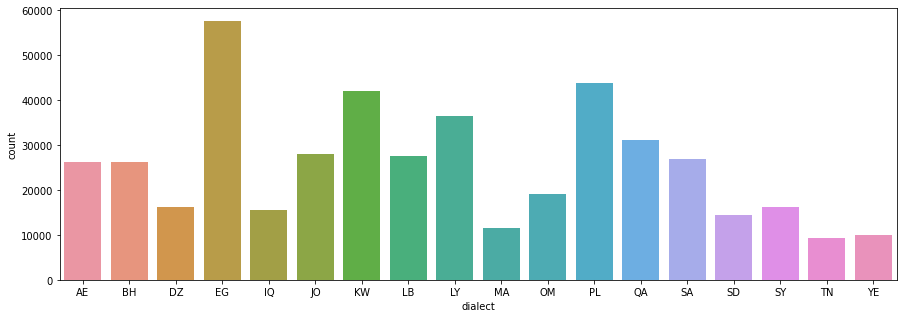

In [9]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df , x="dialect")

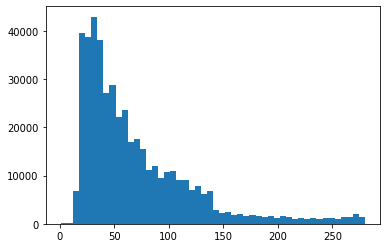

In [10]:
# number of words in tweets
plt.hist([len(s) for s in df['tweets']], bins=50)
plt.show()

gonna choose max number of words to be 50 to reduce computations ,
50 words should be enough for this problem

**top 10 words for each dialect :**

In [11]:
unique_classes=list(df['dialect'].unique())
unique_classes

for i in unique_classes:
    df1=df.loc[df["dialect"]==i]
    print(f'top 10 words for {i}')
    print(Counter(" ".join(df1["tweets"]).split()).most_common(10) ,'\n')

top 10 words for MA
[('و', 2224), ('من', 1989), ('الله', 1499), ('على', 1434), ('ههه', 1377), ('في', 1317), ('لي', 1234), ('انا', 1132), ('غير', 1085), ('اللي', 1011)] 

top 10 words for BH
[('من', 5699), ('في', 4777), ('ما', 4587), ('اللي', 3688), ('و', 3507), ('على', 2903), ('الله', 2827), ('بس', 2520), ('يا', 2246), ('لا', 1836)] 

top 10 words for IQ
[('من', 3247), ('بس', 2035), ('ما', 2020), ('مو', 1641), ('على', 1536), ('اللي', 1456), ('الله', 1170), ('لو', 1059), ('والله', 990), ('ههه', 932)] 

top 10 words for KW
[('من', 10482), ('اللي', 7477), ('ما', 6556), ('و', 5705), ('الله', 5617), ('على', 4964), ('في', 4320), ('بس', 4258), ('مو', 3699), ('كل', 3028)] 

top 10 words for AE
[('من', 6497), ('ما', 5677), ('و', 5167), ('في', 5041), ('اللي', 4516), ('الله', 3957), ('على', 3205), ('بس', 2204), ('يا', 2124), ('كل', 1821)] 

top 10 words for EG
[('من', 12240), ('مش', 10970), ('في', 10475), ('اللي', 9634), ('يا', 8872), ('ده', 8526), ('و', 8277), ('بس', 6284), ('على', 5692), ('انا'

spliting data

In [12]:
X=df.tweets
y=df.dialect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# ML-model (LinearSVC)

In [13]:
tf=TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5),max_df=0.5,min_df=20)
clf=LinearSVC()#class_weight='balanced'


pipeline = make_pipeline(tf,clf)

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.5, min_df=20,
                                 ngram_range=(2, 5))),
                ('linearsvc', LinearSVC())])

In [15]:
def print_report(pipe, x_test, y_test):
    y_pred = pipe.predict(x_test)
    report = metrics.classification_report(y_test, y_pred)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
    

print_report(pipeline, X_test, y_test)

              precision    recall  f1-score   support

          AE       0.46      0.44      0.45      5259
          BH       0.42      0.35      0.38      5258
          DZ       0.64      0.58      0.61      3237
          EG       0.73      0.87      0.80     11527
          IQ       0.64      0.60      0.62      3099
          JO       0.46      0.37      0.41      5584
          KW       0.52      0.62      0.56      8422
          LB       0.64      0.70      0.67      5524
          LY       0.67      0.72      0.70      7300
          MA       0.75      0.64      0.69      2308
          OM       0.45      0.40      0.43      3823
          PL       0.51      0.57      0.54      8749
          QA       0.50      0.50      0.50      6214
          SA       0.44      0.47      0.45      5367
          SD       0.71      0.61      0.66      2887
          SY       0.48      0.34      0.40      3248
          TN       0.69      0.48      0.57      1849
          YE       0.44    

# preparing data for deep learning

In [17]:
# initialize Tokenizer to encode strings into integers
tokenizer = Tokenizer()

# calculate number of rows in our dataset
# num_rows = df_train.shape[0]

# create vocabulary from all words in our dataset for encoding
tokenizer.fit_on_texts(X_train)

# max length of 1 row (number of words)
row_max_length = 50

# count number of unique words
vocabulary_size = len(tokenizer.word_index) + 1

# convert words into integers
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
# X_sub_tokens = tokenizer.texts_to_sequences(df_submission['Phrase'].values)

# ensure every row has same size - pad missing with zeros
X_train_pad = pad_sequences(X_train_tokens, maxlen=row_max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=row_max_length, padding='post')
# X_sub_pad = pad_sequences(X_sub_tokens, maxlen=row_max_length, padding='post')

print(X_train_pad.shape,X_test_pad.shape)

(366557, 50) (91640, 50)


In [18]:
encoder = LabelEncoder()
y_encoded_tr = encoder.fit_transform(y_train)
y_encoded_tr = to_categorical(y_encoded_tr)
y_encoded_ts = encoder.transform(y_test)
y_encoded_ts = to_categorical(y_encoded_ts)
print(y_encoded_tr.shape,y_encoded_ts.shape)

(366557, 18) (91640, 18)


# **CNN**

In [19]:
EMBEDDING_DIM = 512
# row_max_length = 50
filter_sizes=[2,3,4,5]
embedding_dim=512
num_filters=512
MAX_SEQUENCE_LENGTH =50

In [20]:
embedding_layer = Embedding(vocabulary_size, EMBEDDING_DIM, input_length=row_max_length,trainable=True)
inputs = Input(shape=(row_max_length,), dtype='int32')
embedding = embedding_layer(inputs)

print(embedding.shape)
reshape = Reshape((row_max_length,EMBEDDING_DIM,1))(embedding)
print(reshape.shape)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)
conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embedding_dim), padding='valid', kernel_initializer='normal', activation='relu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)
maxpool_3 = MaxPool2D(pool_size=(MAX_SEQUENCE_LENGTH - filter_sizes[3] + 1, 1), strides=(1,1), padding='valid')(conv_3)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2,maxpool_3])
flatten = Flatten()(concatenated_tensor)

dropout = Dropout(.5)(flatten)
den = Dense(1024, activation='relu')(dropout)
dropout_2 = Dropout(.2)(den)
output = Dense(len(encoder.classes_), activation='softmax')(dropout_2)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

checkpoint = ModelCheckpoint('weights_cnn_sentece.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')#monitor='val_accuracy'
# adam = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

(None, 50, 512)
(None, 50, 512, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 512)      230583296   ['input_1[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 50, 512, 1)   0           ['embedding[0][0]']              
                                                                                                  
 conv2d (Conv2D)                (None, 49, 1, 512)   524800      ['reshape[0][0]']                
                                                           

In [ ]:
Cnn_1st=model.fit(X_train_pad, y_encoded_tr, validation_split = .1,epochs=5, batch_size=32,callbacks=[checkpoint])

Epoch 1/5
10310/10310 [==============================] - ETA: 0s - loss: 1.8164 - accuracy: 0.4374
Epoch 1: val_accuracy improved from -inf to 0.51105, saving model to weights_cnn_sentece.hdf5
10310/10310 [==============================] - 2669s 256ms/step - loss: 1.8164 - accuracy: 0.4374 - val_loss: 1.5789 - val_accuracy: 0.5110
Epoch 2/5
 5212/10310 [==============>...............] - ETA: 21:06 - loss: 1.2311 - accuracy: 0.6220

In [ ]:

learning_data = pd.DataFrame(Cnn_1st.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(Cnn_1st.history['loss'],'r',linewidth=3.0)
plt.plot(Cnn_1st.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :Bi-GRU',fontsize=16)
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_encoded_ts)

In [ ]:
y_pred = np.round(model.predict(X_test_pad))#np.round

In [ ]:
print(classification_report(y_encoded_ts,y_pred,target_names=encoder.classes_))
print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_encoded_ts, y_pred)))
# print("accuracy: {:0.3f}".format(metrics.f1_score(y_encoded_ts, y_pred)))


# GRU

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [ ]:
EMBEDDING_DIM = 512

model = Sequential()
model.add(Embedding(vocabulary_size, EMBEDDING_DIM, input_length=row_max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(GRU(128)))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(len(encoder.classes_), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(X_train_pad, y_encoded_tr, epochs=8,validation_split = 0.1, batch_size=128, callbacks=[callback])#save_best_only=True ,monitor='val_accuracy'

In [ ]:
model.summary()

In [ ]:
learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :Bi-GRU',fontsize=16)
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_encoded_ts)

In [ ]:
y_pred = np.round(model.predict(X_test_pad))


In [ ]:
print(classification_report(y_encoded_ts,y_pred,target_names=encoder.classes_))
print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_encoded_ts, y_pred)))
# print("accuracy: {:0.3f}".format(metrics.f1_score(y_encoded_ts, y_pred)))

coclusion :

savinvg svc model

In [16]:
import pickle

In [17]:
# save the model to disk
filename = 'svc_pipe_model'
pickle.dump(pipeline, open(filename, 'wb'))